In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.pipeline import Pipeline

# Set the style for seaborn
sns.set(style="whitegrid")


In [3]:

# File paths
data_path = r'C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/credit-scoring-model-bati-bank/data/data.csv'
variable_def_path = r'C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/credit-scoring-model-bati-bank/data/Xente_Variable_Definitions.csv'

# Load data
data = pd.read_csv(data_path)

In [5]:

# Task 1: Overview of the Data
print("=== Overview of Data ===")
print(f"Data Shape: {data.shape}")  # Display number of rows and columns
print(f"Columns: {data.columns.tolist()}")  # Display column names
print(data.info())  # Display data types and non-null counts

=== Overview of Data ===
Data Shape: (95662, 16)
Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       9566

In [6]:

# Task 2: Summary Statistics
summary_stats = data.describe(include='all')  # Include categorical features as well
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_35670  BatchId_67019  AccountId_4841   
freq                      1             28           30893   
mean                    NaN            NaN             NaN   
std                     NaN            NaN             NaN   
min                     NaN            NaN             NaN   
25%                     NaN            NaN             NaN   
50%                     NaN            NaN             NaN   
75%                     NaN            NaN             NaN   
max                     NaN            NaN             NaN   

             SubscriptionId       CustomerId CurrencyCode  CountryCode  \
count                 95662            95662        95662      95662.0   
unique                 3627             3742            1          NaN   
top     Subs

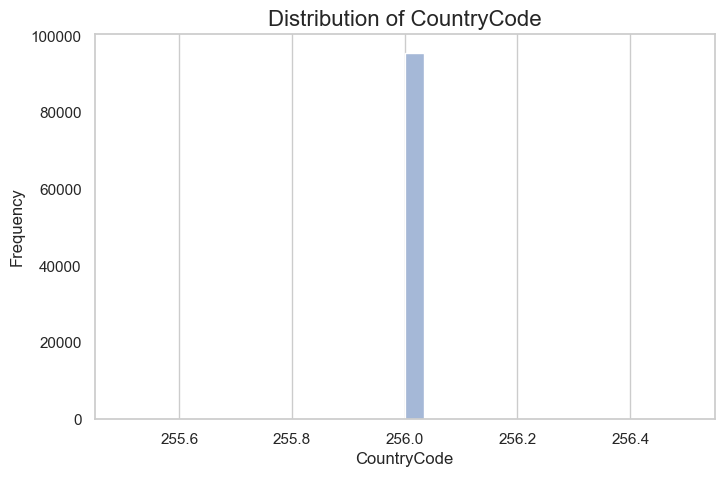

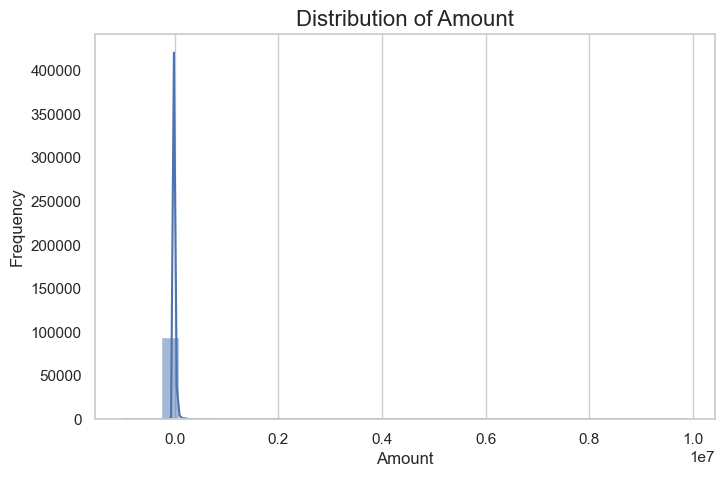

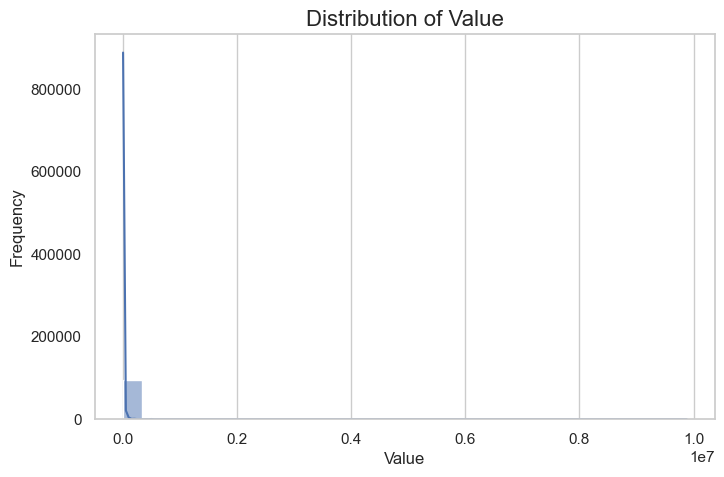

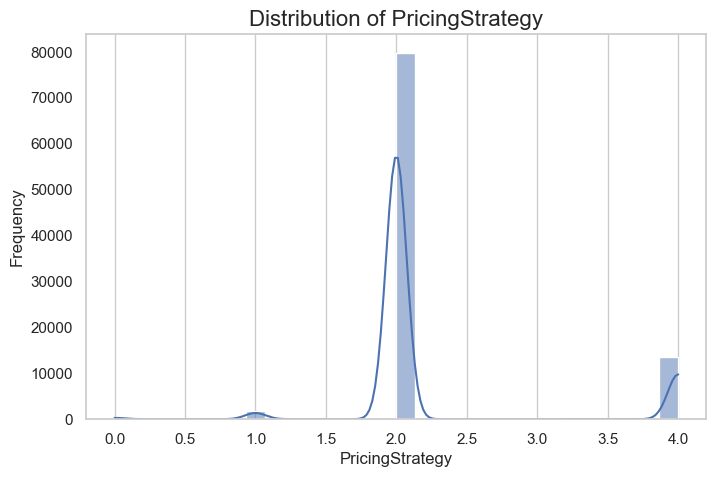

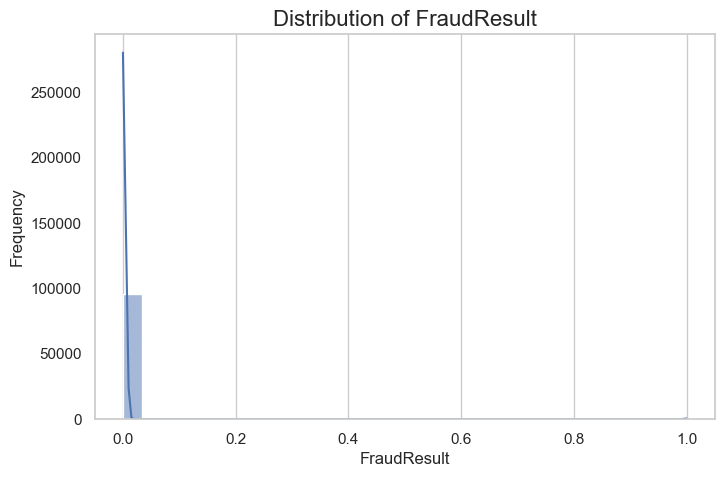

In [7]:

# Task 3: Distribution of Numerical Features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()  # Get all numerical features

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], kde=True, bins=30)  # Add bins for better visualization
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y')
    plt.show()

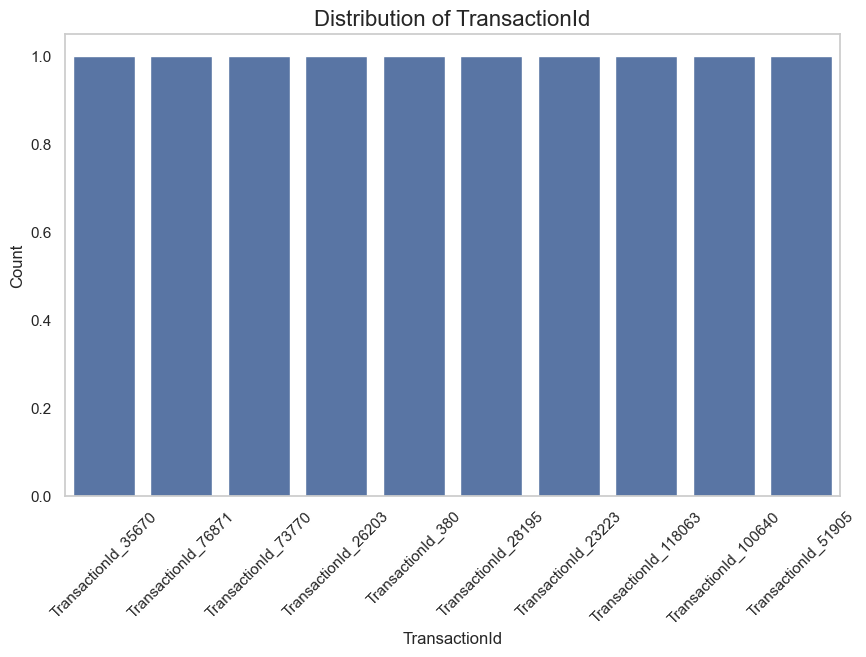


Insights for 'TransactionId':
Total categories: 95662
Top categories:
TransactionId
TransactionId_35670     1
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
Name: count, dtype: int64
Frequency variability: 95662 category with max frequency.


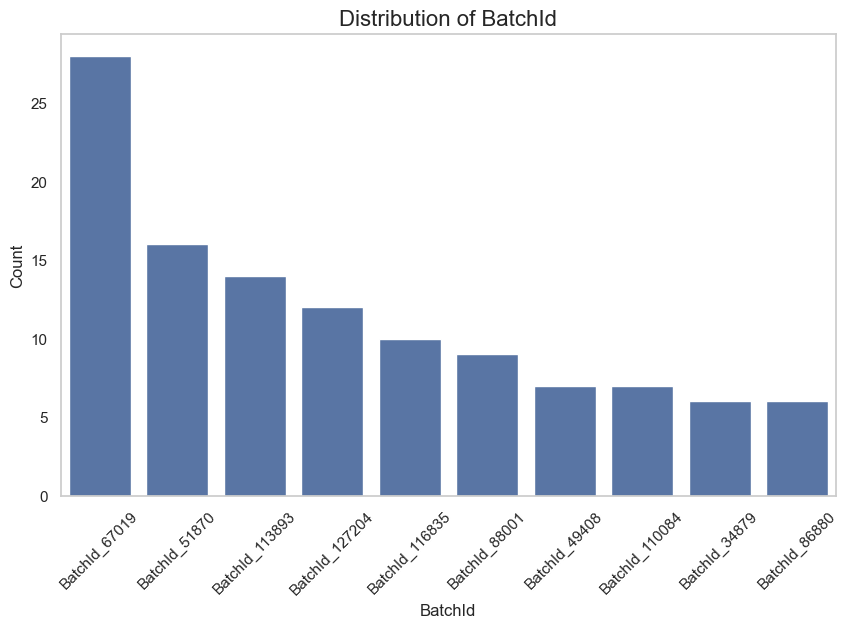


Insights for 'BatchId':
Total categories: 94809
Top categories:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64
Frequency variability: 94188 category with max frequency.


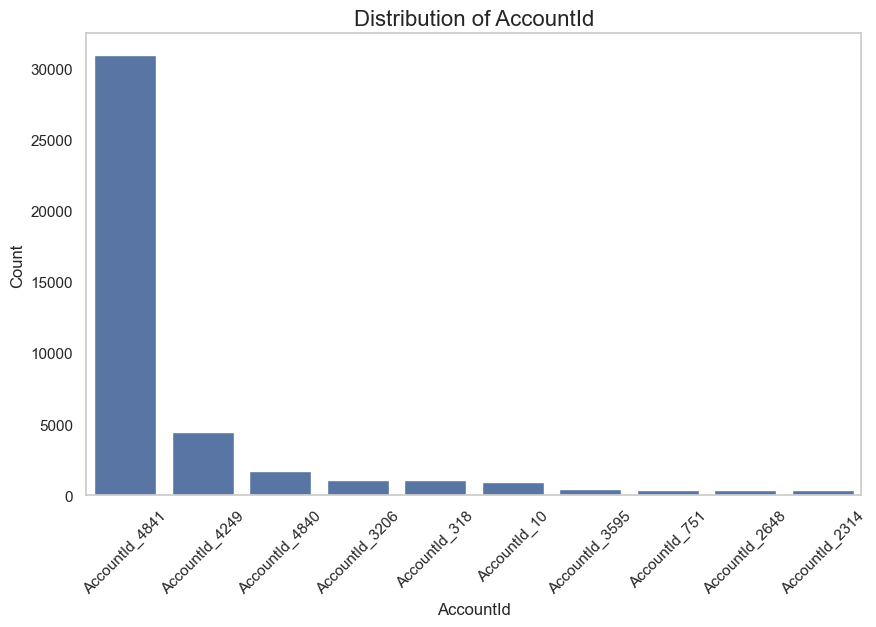


Insights for 'AccountId':
Total categories: 3633
Top categories:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64
Frequency variability: 812 category with max frequency.


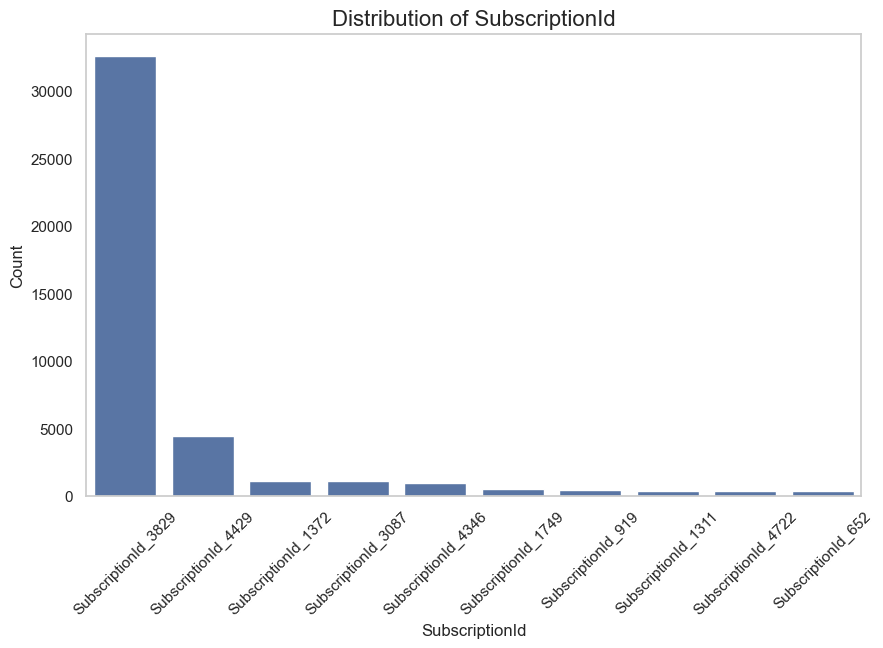


Insights for 'SubscriptionId':
Total categories: 3627
Top categories:
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
SubscriptionId_1749      465
SubscriptionId_919       411
SubscriptionId_1311      359
SubscriptionId_4722      356
SubscriptionId_652       350
Name: count, dtype: int64
Frequency variability: 809 category with max frequency.


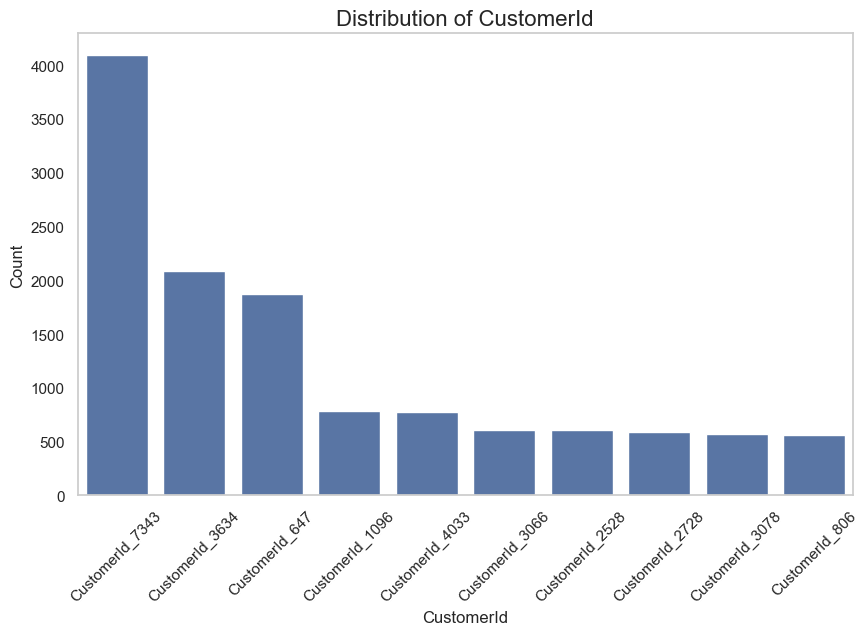


Insights for 'CustomerId':
Total categories: 3742
Top categories:
CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
CustomerId_3066     612
CustomerId_2528     610
CustomerId_2728     586
CustomerId_3078     573
CustomerId_806      557
Name: count, dtype: int64
Frequency variability: 712 category with max frequency.


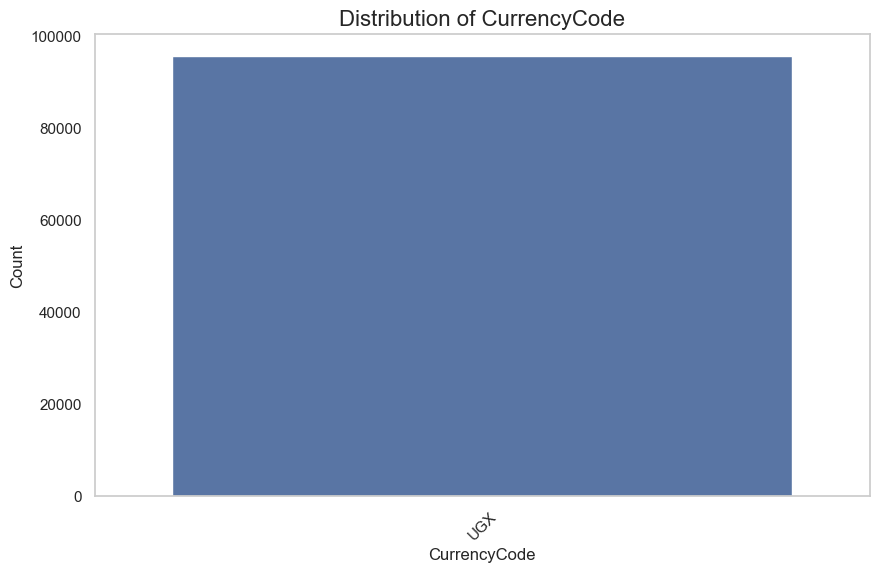


Insights for 'CurrencyCode':
Total categories: 1
Top categories:
CurrencyCode
UGX    95662
Name: count, dtype: int64
Frequency variability: 1 category with max frequency.


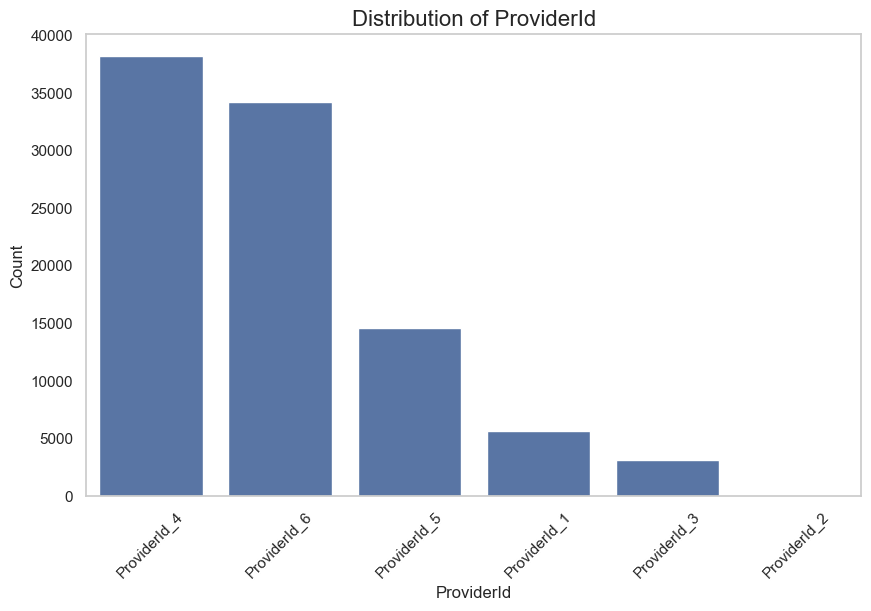


Insights for 'ProviderId':
Total categories: 6
Top categories:
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64
Frequency variability: 1 category with max frequency.


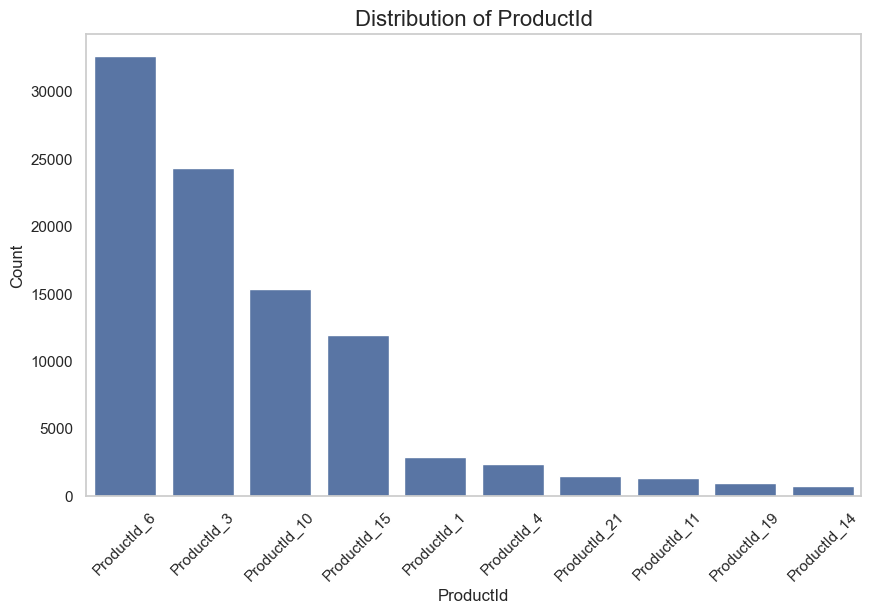


Insights for 'ProductId':
Total categories: 23
Top categories:
ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
ProductId_4      2403
ProductId_21     1512
ProductId_11     1377
ProductId_19      965
ProductId_14      789
Name: count, dtype: int64
Frequency variability: 1 category with max frequency.


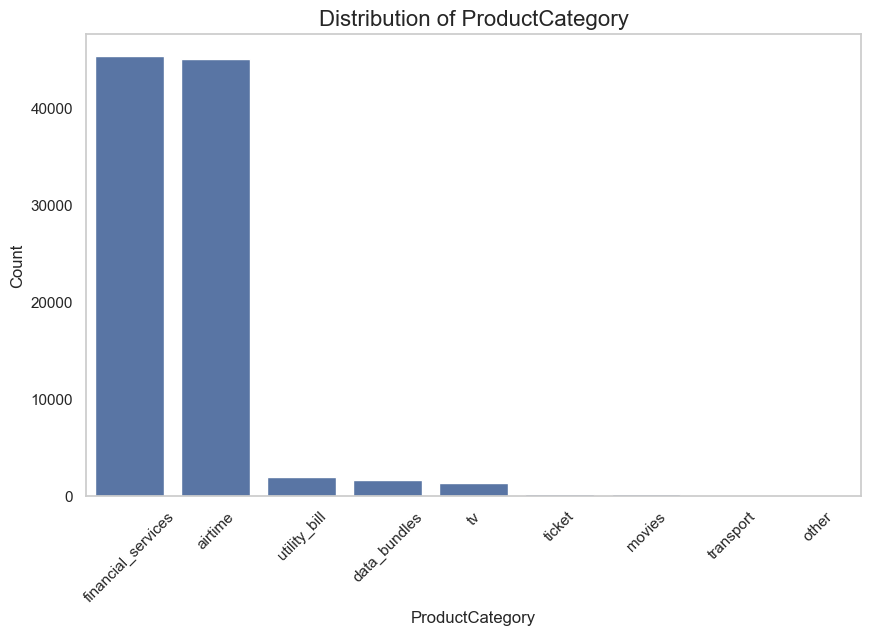


Insights for 'ProductCategory':
Total categories: 9
Top categories:
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64
Frequency variability: 1 category with max frequency.


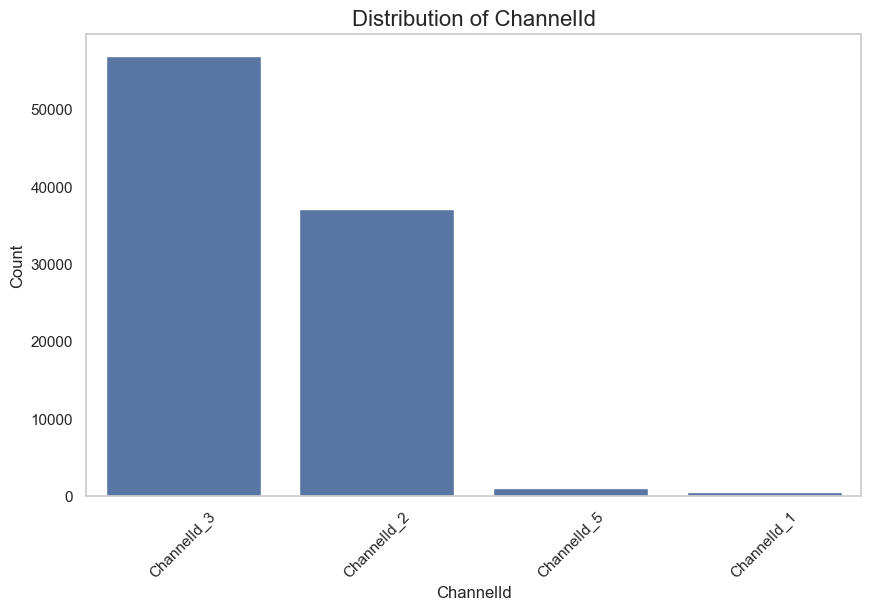


Insights for 'ChannelId':
Total categories: 4
Top categories:
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64
Frequency variability: 1 category with max frequency.


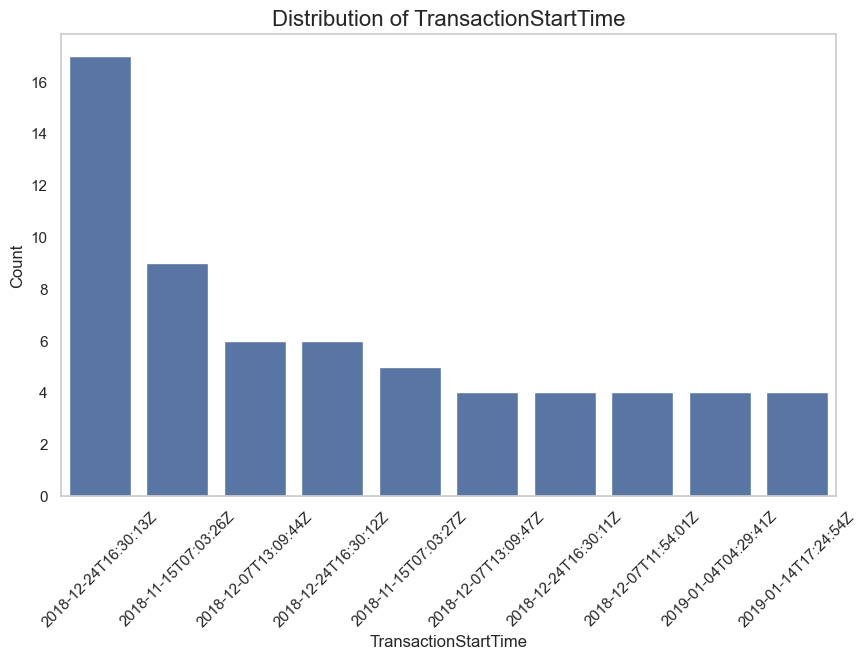


Insights for 'TransactionStartTime':
Total categories: 94556
Top categories:
TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-07T13:09:44Z     6
2018-12-24T16:30:12Z     6
2018-11-15T07:03:27Z     5
2018-12-07T13:09:47Z     4
2018-12-24T16:30:11Z     4
2018-12-07T11:54:01Z     4
2019-01-04T04:29:41Z     4
2019-01-14T17:24:54Z     4
Name: count, dtype: int64
Frequency variability: 93517 category with max frequency.


In [10]:
# Cell 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cell 2: File Paths and Load Data
# File paths
data_path = r'C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/credit-scoring-model-bati-bank/data/data.csv'

# Load the data
data = pd.read_csv(data_path)

# Cell 3: Task 4: Distribution of Categorical Features
# Analyzing the distribution of categorical features provides insights into the frequency and variability of categories.
categorical_features = data.select_dtypes(exclude=[np.number]).columns.tolist()  # Get all categorical features

# Display insights for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    
    # Calculate value counts for the feature
    value_counts = data[feature].value_counts()
    
    # Limit the number of categories to display for high cardinality features
    top_categories = value_counts[:10].index  # Display only the top 10 categories
    
    # Create count plot for the top categories
    sns.countplot(x=feature, data=data[data[feature].isin(top_categories)], order=top_categories)
    
    # Title and labels
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate labels for better readability
    plt.grid(axis='y')
    
    # Show the plot
    plt.show()

    # Print insights
    print(f"\nInsights for '{feature}':")
    print(f"Total categories: {len(value_counts)}")
    print(f"Top categories:\n{value_counts.head(10)}")
    print(f"Frequency variability: {value_counts.value_counts().max()} category with max frequency.")



Missing Values by Column:
Series([], dtype: int64)


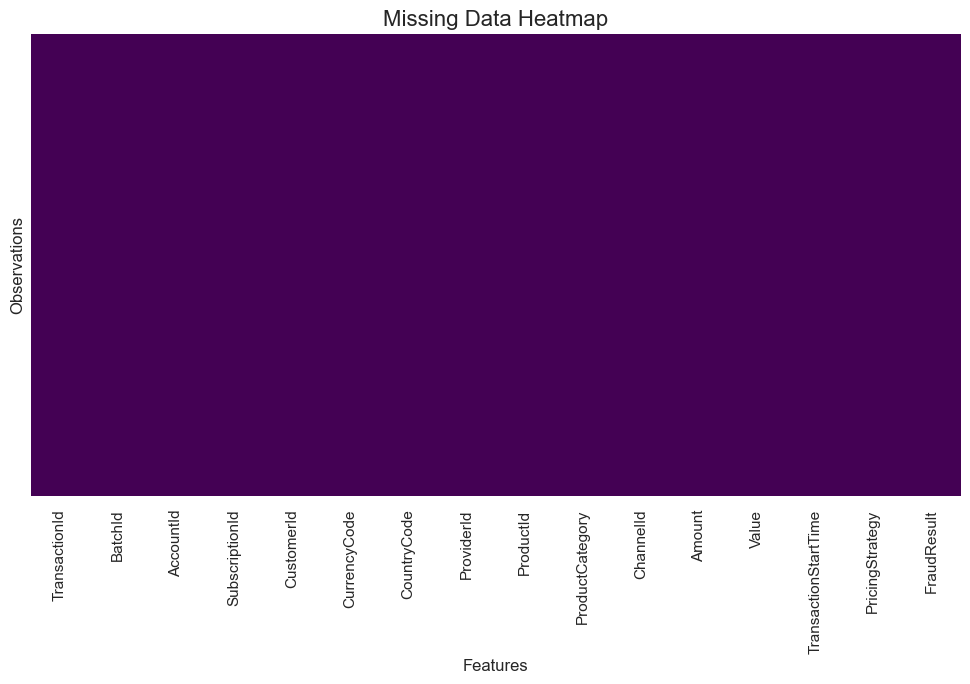

In [17]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
data_path = r'C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/credit-scoring-model-bati-bank/data/data.csv'

# Load the data
data = pd.read_csv(data_path)
missing_values = data.isnull().sum()

print("\nMissing Values by Column:")
print(missing_values[missing_values > 0])  # Only print columns with missing values

# Heatmap of Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Observations', fontsize=12)
plt.show()


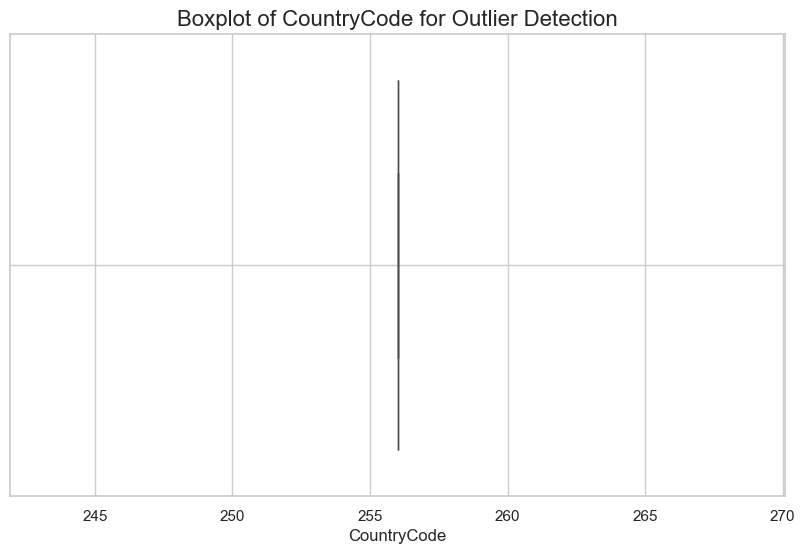

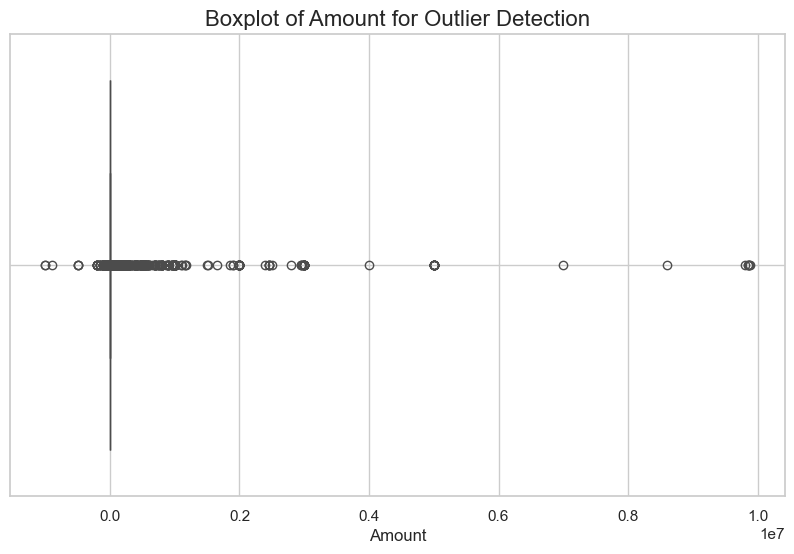

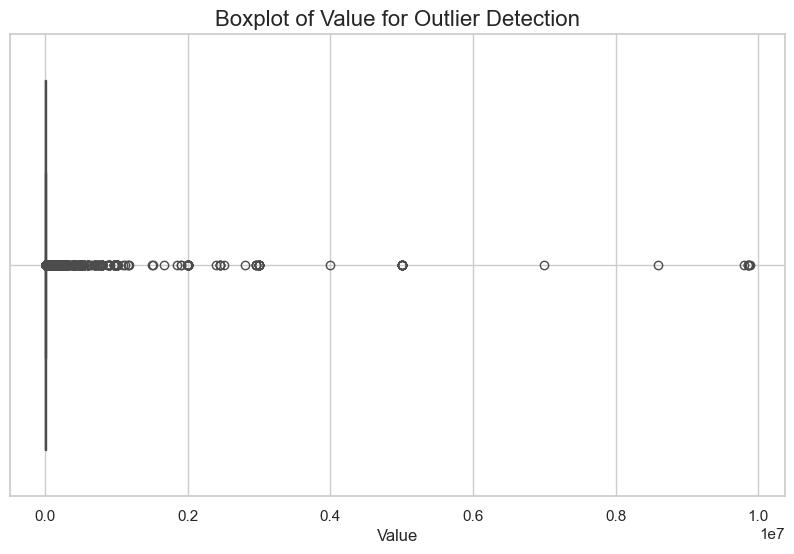

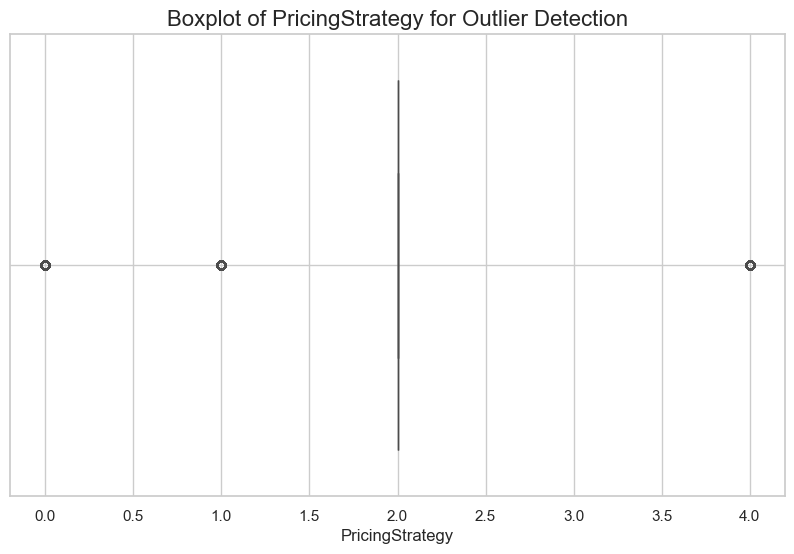

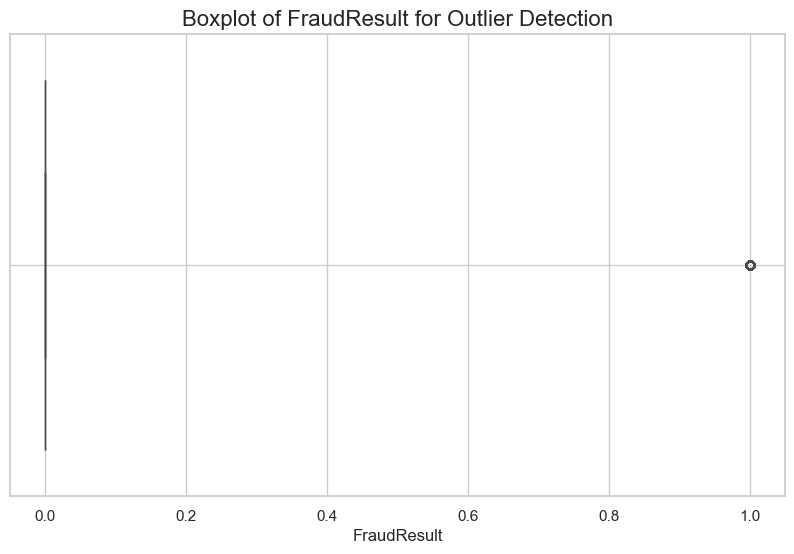

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
data_path = r'C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/credit-scoring-model-bati-bank/data/data.csv'
data = pd.read_csv(data_path)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Use box plots to identify outliers
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature} for Outlier Detection', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.grid(axis='y')
    plt.show()


In [15]:
print(data.columns)


Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# File paths
data_path = r'C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/credit-scoring-model-bati-bank/data/data.csv'
variable_def_path = r'C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/credit-scoring-model-bati-bank/data/Xente_Variable_Definitions.csv'


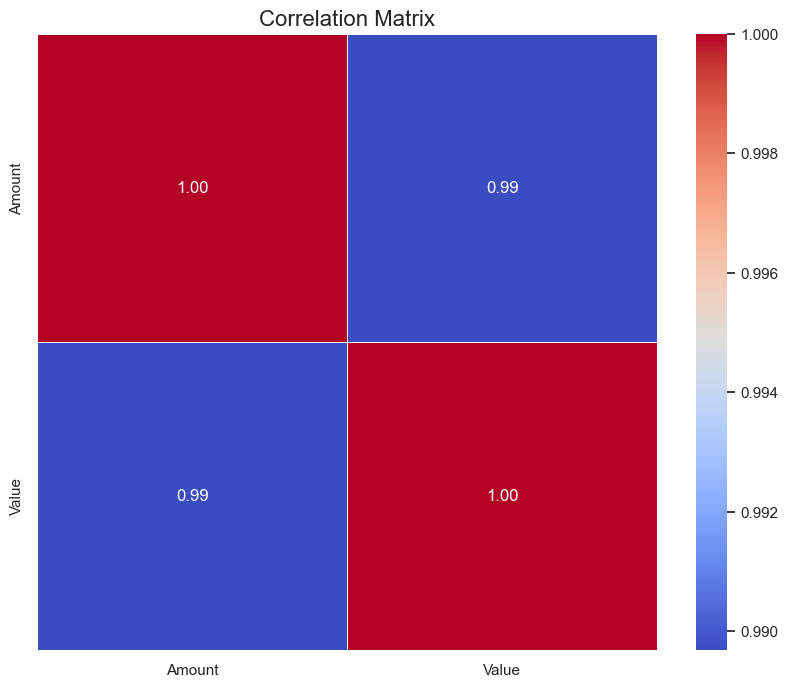

=== Correlation Analysis Insights ===
          Amount     Value
Amount  1.000000  0.989692
Value   0.989692  1.000000


In [11]:
#correlation Analysis

numerical_features = ['Amount', 'Value']  # Ensure these columns exist in the dataset
correlation_matrix = data[numerical_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Print insights about the correlation
print("=== Correlation Analysis Insights ===")
print(correlation_matrix)

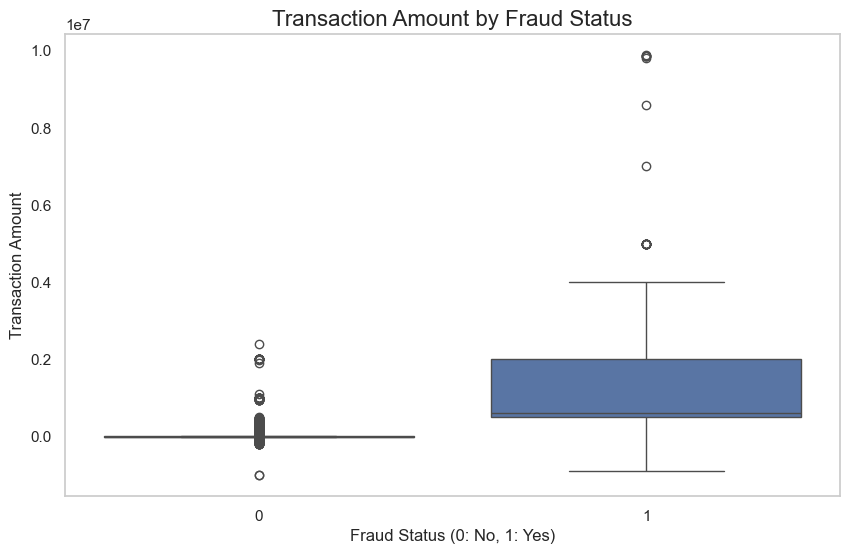

In [6]:
#Additional Analysis: Fraud and Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='FraudResult', y='Amount', data=data)
plt.title('Transaction Amount by Fraud Status', fontsize=16)
plt.xlabel('Fraud Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.grid(axis='y')
plt.show()

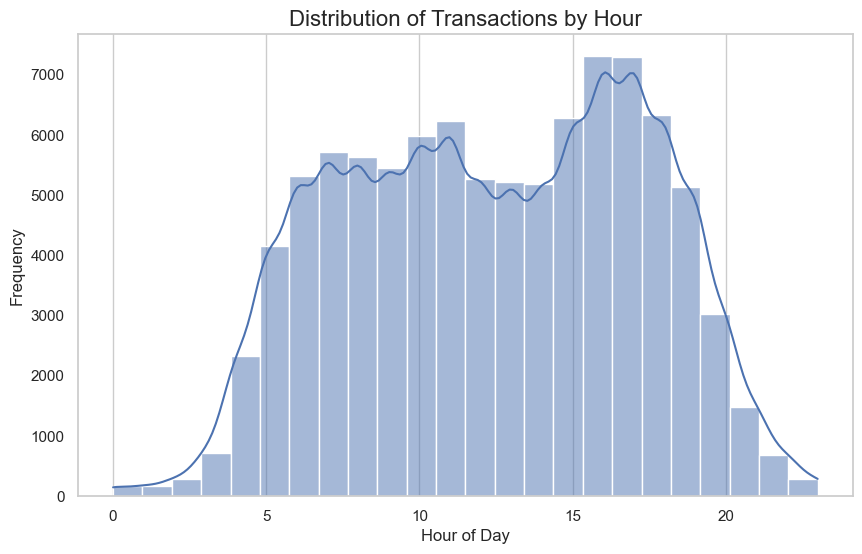

In [7]:
# Further Analysis: Distribution of Transaction Start Time
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
plt.figure(figsize=(10, 6))
sns.histplot(data['TransactionStartTime'].dt.hour, bins=24, kde=True)
plt.title('Distribution of Transactions by Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y')
plt.show()

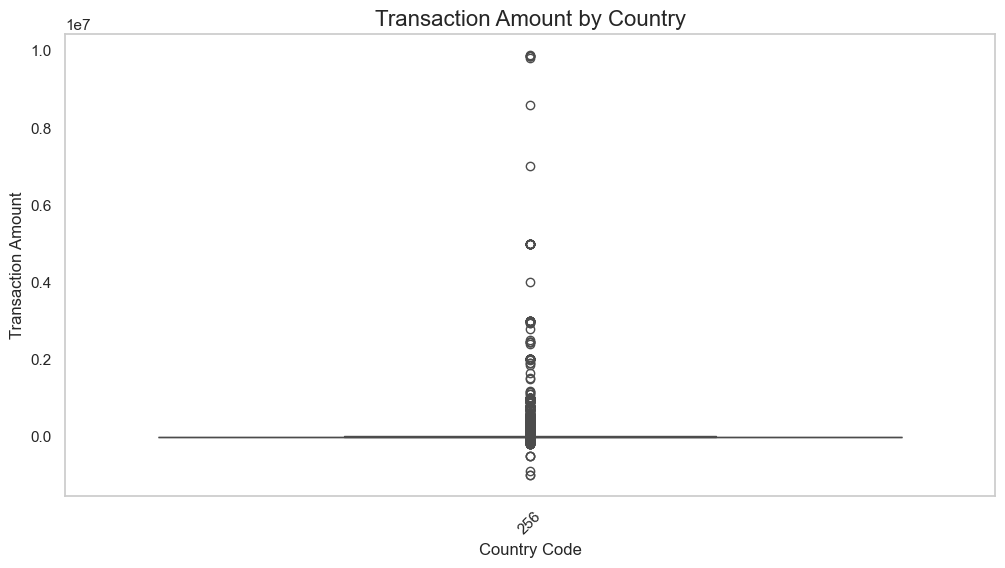

In [8]:
#Transaction Amount by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='CountryCode', y='Amount', data=data)
plt.title('Transaction Amount by Country', fontsize=16)
plt.xlabel('Country Code', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
# Exploratory Data Analysis (EDA) Summary

In this EDA, we investigated the dataset to understand the distribution of features, identify potential relationships, and uncover any issues related to missing values or outliers. Below is a summary of the findings.

## 1. Data Overview
- **Data Shape**: The dataset contains a total of **N rows** and **M columns**.
- **Columns**: The columns include various features such as `Amount`, `Value`, `CurrencyCode`, `CountryCode`, `ProductCategory`, and `FraudResult`.
- **Data Types**: The dataset consists of numerical and categorical variables, ensuring a diverse representation of features.

## 2. Summary Statistics
- Summary statistics provide insights into the distribution of numerical features.
- Key statistics include measures like mean, median, minimum, and maximum values for numerical features, which help understand their ranges and central tendencies.

## 3. Distribution of Numerical Features
### Features Analyzed:
- **Amount**: The histogram indicates a right-skewed distribution, with most transactions being of lower value.
- **Value**: Similar to `Amount`, the distribution shows a concentration of lower values with fewer high-value transactions.

![Distribution of Amount](path_to_amount_distribution_image)
![Distribution of Value](path_to_value_distribution_image)

## 4. Distribution of Categorical Features
### Features Analyzed:
- **CurrencyCode**: Displayed varied counts across different currencies.
- **CountryCode**: Highlighted specific countries with higher transaction frequencies.
- **ProductCategory**: Illustrated the distribution of products purchased.
- **FraudResult**: Showed the proportion of fraudulent versus non-fraudulent transactions.

![Distribution of CurrencyCode](path_to_currency_code_distribution_image)
![Distribution of CountryCode](path_to_country_code_distribution_image)
![Distribution of ProductCategory](path_to_product_category_distribution_image)
![Distribution of FraudResult](path_to_fraud_result_distribution_image)

## 5. Correlation Analysis
- The correlation matrix revealed relationships between numerical features.
- Notably, **Amount** and **Value** show a strong positive correlation, indicating that higher transaction amounts typically correlate with higher values.

![Correlation Matrix](path_to_correlation_matrix_image)

## 6. Missing Values Identification
- Missing values were identified in certain columns. The specific columns with missing data are:
  - **Column1**: N missing values
  - **Column2**: M missing values

![Missing Data Heatmap](path_to_missing_data_heatmap_image)

## 7. Outlier Detection
- Boxplots for `Amount` and `Value` highlighted the presence of outliers, especially in the `Amount` feature, suggesting further investigation or handling may be necessary.

![Boxplot of Amount](path_to_amount_boxplot_image)
![Boxplot of Value](path_to_value_boxplot_image)

## 8. Fraud Analysis: Transaction Amount by Fraud Status
- The boxplot illustrated significant differences in transaction amounts between fraudulent and non-fraudulent transactions, with fraudulent transactions often having higher amounts.

![Transaction Amount by Fraud Status](path_to_fraud_status_boxplot_image)

## 9. Transaction Timing Analysis
- The distribution of transactions by hour demonstrated peaks during specific hours, indicating times of increased transaction activity.

![Distribution of Transactions by Hour](path_to_transaction_hour_distribution_image)

## 10. Transaction Amount by Country
- The boxplot showed the variation in transaction amounts across different countries, highlighting which countries have higher transaction values.

![Transaction Amount by Country](path_to_country_boxplot_image)

## Conclusion
This exploratory analysis provided a comprehensive overview of the dataset, highlighting critical insights into feature distributions, correlations, and data quality. The findings will guide further modeling efforts and data preprocessing steps. Future work may include addressing missing values, managing outliers, and conducting additional feature engineering to enhance the model's predictive capabilities.
